# Computer Vision Project 2

## 1. Convolution and Derivative Filters - spider_lily-modified.jpg

In [1]:
import numpy as np
import cv2  # For loading and displaying images
import matplotlib.pyplot as plt 

In [ ]:
image = cv2.imread('ayanakoji.jpg', cv2.IMREAD_GRAYSCALE)
image = image.astype(float)  # Convert to float

In [2]:
def convolution(f, I):
    f_height, f_width = f.shape
    I_height, I_width = I.shape
    pad_height, pad_width = f_height // 2, f_width // 2

    I_padded = np.pad(I, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    im_conv = np.zeros(I.shape, dtype=np.float32)

    for i in range(I_height):
        for j in range(I_width):
            im_conv[i, j] = np.sum(f * I_padded[i:i + f_height, j:j + f_width])

    return im_conv

In [ ]:
sigma = 5
x_range = np.linspace(-int(sigma/2),int(sigma/2),sigma)
# print(x_range)
gaussian_filter = [ (1 / (sigma * np.sqrt(2*np.pi)) * np.exp(-x**2/(2*sigma**2))) for x in x_range ]
total = sum(gaussian_filter)
gaussian_filter = [[x/total for x in gaussian_filter]]
Gx = np.array(gaussian_filter)
Gy = Gx.reshape(-1,1)
print("Gx =",Gx)
print("Gy =",Gy)

In [ ]:
image_filtered_x = convolution(Gx, image)
image_filtered_y = convolution(Gy, image_filtered_x)

In [ ]:
plt.imshow(image_filtered_x, cmap='gray')

In [ ]:
plt.imshow(image_filtered_y, cmap='gray')

In [ ]:
derivative_filter_x = np.array([[-1], [0], [1]])
derivative_filter_y = derivative_filter_x.reshape((1, -1))

In [ ]:
image_dx = convolution(derivative_filter_x, image_filtered_y)
image_dy = convolution(derivative_filter_y, image_filtered_y)

In [ ]:
plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.imshow(image_dx, cmap='gray')
plt.title('Dervative Image Dx')

plt.subplot(1, 2, 2)
plt.imshow(image_dy, cmap='gray')
plt.title('Derivative Image Dy')

plt.show()

In [ ]:
gradient_magnitude = np.sqrt(image_dx ** 2 + image_dy ** 2)

In [ ]:
plt.imshow(gradient_magnitude, cmap='gray')

In [ ]:
threshold = 11
binary_edges = (gradient_magnitude > threshold).astype(np.uint8) * 255

In [ ]:
cv2.imshow('Original Image', image.astype(np.uint8))
cv2.imshow('Gradient Magnitude', gradient_magnitude.astype(np.uint8))
cv2.imshow('Binary Edges', binary_edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')

plt.subplot(1, 3, 3)
plt.imshow(binary_edges, cmap='gray')
plt.title('Binary Edges(Threshold=20)')

plt.show()

## Cross Correlation and Template Matching

In [31]:
original_image = cv2.imread('multiplekeys.png', cv2.IMREAD_GRAYSCALE)
template = cv2.imread('singlekey_bw.png', cv2.IMREAD_GRAYSCALE)

In [32]:
min_value = np.min(template)
max_value = np.max(template)
mean_value = np.mean(template)

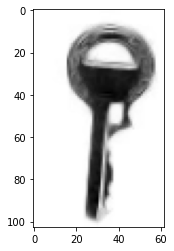

In [33]:
normalized_template = template - mean_value
plt.imshow(normalized_template, cmap='gray')

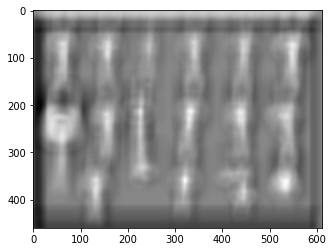

In [44]:
correlation_image = convolution(normalized_template, original_image)
plt.imshow(correlation_image, cmap='gray')

In [45]:
peak,peak_x,peak_y = 0,0,0

for i in range(correlation_image.shape[0]):
    for j in range(correlation_image.shape[1]):
        if(peak<correlation_image[i][j]):
            peak = correlation_image[i][j]
            peak_y,peak_x = i,j
            
print("Peak matching:",peak,"\nPeak's x coordinate:",peak_x,"\nPeak's y coordinate:",peak_y)
# print(correlation_image.shape)

Peak matching: 21884380.0 
Peak's x coordinate: 321 
Peak's y coordinate: 359


In [46]:
cv2.circle(correlation_image, (peak_x, peak_y), 20, (0, 0, 0), 5)

array([[  6304977.5 ,   4782022.  ,   3169721.5 , ...,   3263821.8 ,
          3854820.5 ,   4626314.  ],
       [  6282293.5 ,   4727595.  ,   3082921.  , ...,   3326519.5 ,
          3955679.  ,   4761452.5 ],
       [  6265925.  ,   4679234.  ,   3002292.5 , ...,   3381737.2 ,
          4049052.8 ,   4889200.5 ],
       ...,
       [-12563124.  , -13500901.  , -14436205.  , ...,  -1952994.6 ,
         -1004182.7 ,    -54070.79],
       [-12475578.  , -13382922.  , -14286474.  , ...,  -2028417.5 ,
         -1110627.2 ,   -193245.88],
       [-12413943.  , -13290541.  , -14162417.  , ...,  -2102245.5 ,
         -1217208.8 ,   -333292.97]], dtype=float32)

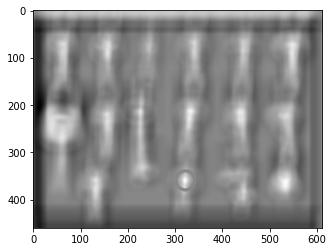

In [47]:
plt.imshow(correlation_image, cmap='gray')
# cv2.imshow("correlation image",correlation_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [49]:
max_peak = -1
max_peak_location = (0, 0)

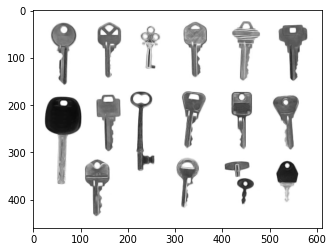

In [50]:
correlation_height, correlation_width = original_image.shape[0] - template.shape[0] , original_image.shape[1] - template.shape[1]
result_image = original_image.copy()
plt.imshow(result_image, cmap='gray')

In [51]:
for y in range(correlation_height):
    for x in range(correlation_width):
        region = original_image[y:y + template.shape[0], x:x + template.shape[1]]
        
        score = np.sum(normalized_template * region)

        if score > max_peak:
            max_peak = score
            max_peak_location = (x, y)

In [52]:
x, y = max_peak_location
original_image_with_peak = original_image.copy()
cv2.circle(original_image_with_peak, (x + template.shape[1] // 2, y + template.shape[0] // 2), 20, (0, 255, 0), 2)

array([[107, 172, 208, ..., 254, 169, 107],
       [169, 226, 244, ..., 255, 251, 175],
       [217, 248, 253, ..., 255, 254, 235],
       ...,
       [254, 255, 255, ..., 255, 255, 255],
       [169, 251, 254, ..., 255, 255, 249],
       [107, 175, 235, ..., 255, 249, 107]], dtype=uint8)

In [53]:
cv2.imshow("Original Image", original_image)
cv2.imshow("Template", template)
cv2.imshow("Peak Image", original_image_with_peak)
cv2.waitKey(0)
cv2.destroyAllWindows()

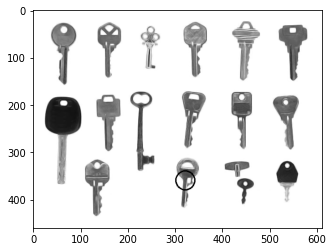

In [55]:
plt.imshow(original_image_with_peak, cmap='gray')

In [56]:
print(f"Maximum Peak Value: {max_peak}")
print(f"Maximum Peak Location: {max_peak_location}")

Maximum Peak Value: 21884379.919354845
Maximum Peak Location: (290, 308)


## Creative Part - Color image edge detection

In [3]:
color_image = cv2.imread('ayanakoji.jpg')

In [4]:
lch_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2Luv)

In [5]:
l_channel, c_channel, h_channel = cv2.split(lch_image)

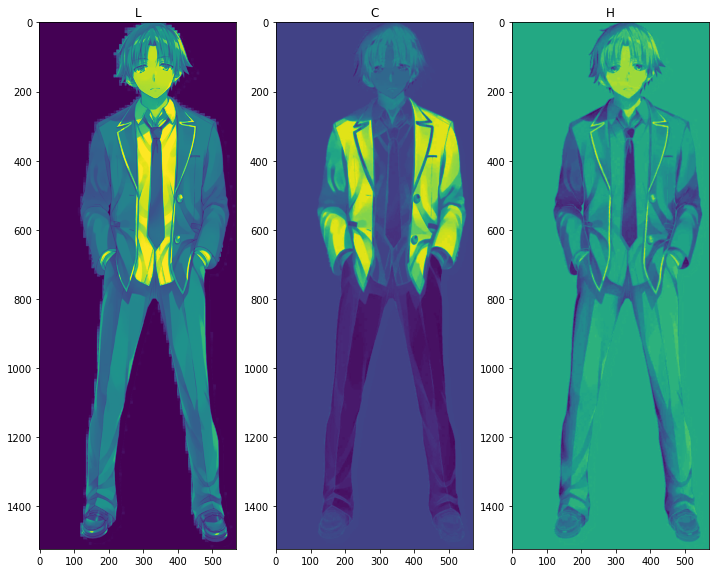

In [6]:
plt.figure(figsize=(12, 12))
plt.subplot(1, 3, 1)
plt.imshow(l_channel)
plt.title('L')

plt.subplot(1, 3, 2)
plt.imshow(c_channel)
plt.title('C')

plt.subplot(1, 3, 3)
plt.imshow(h_channel)
plt.title('H')

plt.show()

In [7]:
sigma = 5
x_range = np.linspace(-int(sigma/2),int(sigma/2),sigma)
# print(x_range)

gaussian_filter = [ (1 / (sigma * np.sqrt(2*np.pi)) * np.exp(-x**2/(2*sigma**2))) for x in x_range ]
total = sum(gaussian_filter)
gaussian_filter = [[x/total for x in gaussian_filter]]

Gx = np.array(gaussian_filter)
Gy = Gx.reshape(-1,1)
print("Gx =",Gx)
print("Gy =",Gy)

Gx = [[0.19205063 0.20392638 0.20804597 0.20392638 0.19205063]]
Gy = [[0.19205063]
 [0.20392638]
 [0.20804597]
 [0.20392638]
 [0.19205063]]


In [8]:
l_smoothed_x = convolution(Gx, l_channel)
l_smoothed_y = convolution(Gy, l_smoothed_x)

c_smoothed_x = convolution(Gx, c_channel)
c_smoothed_y = convolution(Gy, c_smoothed_x)

h_smoothed_x = convolution(Gx, h_channel)
h_smoothed_y = convolution(Gy, h_smoothed_x)

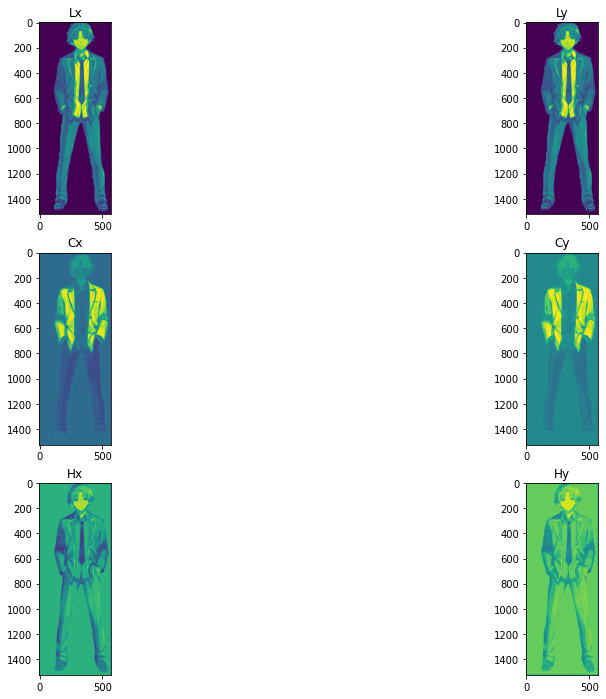

In [9]:
plt.figure(figsize=(16, 12))
plt.subplot(3, 2, 1)
plt.imshow(l_smoothed_x)
plt.title('Lx')

plt.subplot(3, 2, 2)
plt.imshow(l_smoothed_y)
plt.title('Ly')

plt.subplot(3, 2, 3)
plt.imshow(c_smoothed_x)
plt.title('Cx')

plt.subplot(3, 2, 4)
plt.imshow(c_smoothed_y)
plt.title('Cy')

plt.subplot(3, 2, 5)
plt.imshow(h_smoothed_x)
plt.title('Hx')

plt.subplot(3, 2, 6)
plt.imshow(h_smoothed_y)
plt.title('Hy')

plt.show()

In [10]:
derivative_filter_x = np.array([[-1], [0], [1]])
derivative_filter_y = derivative_filter_x.reshape((1, -1))

In [11]:
l_dx = convolution(derivative_filter_x, l_smoothed_y)
l_dy = convolution(derivative_filter_y, l_smoothed_y)
grad_mag_l = np.sqrt(l_dx ** 2 + l_dy ** 2)

c_dx = convolution(derivative_filter_x, c_smoothed_y)
c_dy = convolution(derivative_filter_y, c_smoothed_y)
grad_mag_c = np.sqrt(l_dx ** 2 + l_dy ** 2)

h_dx = convolution(derivative_filter_x, h_smoothed_y)
h_dy = convolution(derivative_filter_y, h_smoothed_y)
grad_mag_h = np.sqrt(l_dx ** 2 + l_dy ** 2)

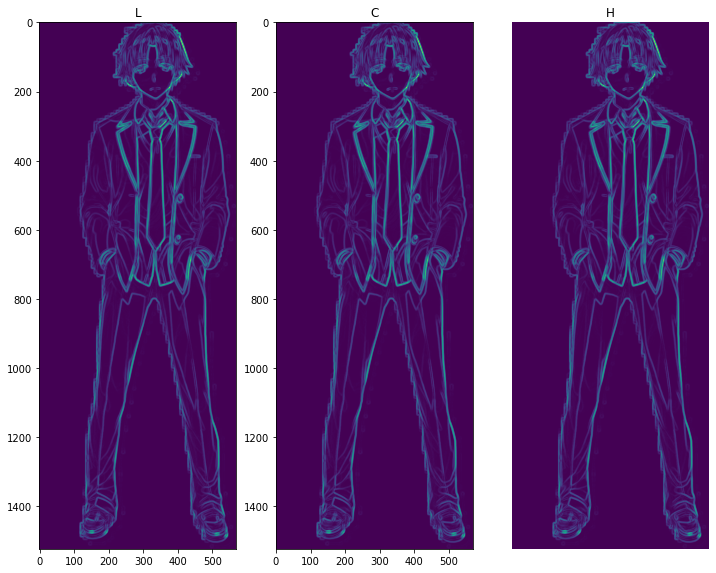

In [12]:
plt.figure(figsize=(12, 12))


plt.subplot(1, 3, 1)
plt.imshow(grad_mag_l)
plt.title('L')

plt.subplot(1, 3, 2)
plt.imshow(grad_mag_c)
plt.title('C')

plt.subplot(1, 3, 3)
plt.imshow(grad_mag_c)
plt.title('H')

plt.axis("off")
plt.show()

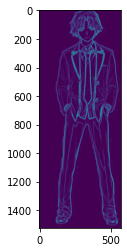

In [13]:
edge_sum = grad_mag_l + grad_mag_c + grad_mag_h
plt.imshow(edge_sum)

In [17]:
threshold = 10
binary_edges_l = (grad_mag_l > threshold) * 255
binary_edges_c = (grad_mag_c > threshold) * 255
binary_edges_h = (grad_mag_h > threshold) * 255

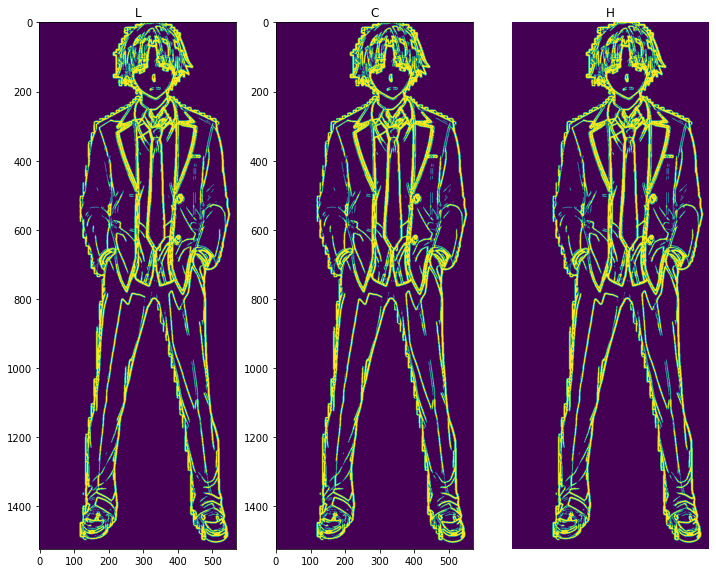

In [18]:
plt.figure(figsize=(12, 12))


plt.subplot(1, 3, 1)
plt.imshow(binary_edges_l)
plt.title('L')

plt.subplot(1, 3, 2)
plt.imshow(binary_edges_c)
plt.title('C')

plt.subplot(1, 3, 3)
plt.imshow(binary_edges_h)
plt.title('H')

plt.axis("off")
plt.show()

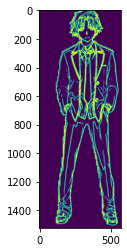

In [19]:
binary_edge_sum = binary_edges_l + binary_edges_c + binary_edges_h
plt.imshow(binary_edge_sum)